# MODELING

In [2]:

import numpy as np 
import pandas as pd 

import statsmodels.api as sm
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn import metrics 
import xgboost as xgb




C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load Dataset

In [3]:
df = pd.read_csv('Data/DC_Prop_Residential_Regression.csv', index_col= 'Unnamed: 0')
df.shape

(45851, 130)

Mendapatkan HARGA yang tidak diketahui ke DataFrame yang berbeda untuk prediksi

## Menentukan Feature dan Target

In [4]:
X=df.drop(['PRICE'],axis=1)
y=df['PRICE']

## Regresi untuk setiap model

In [6]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    print('Model Performance')
    print('R2:', metrics.r2_score(y_test, predictions))
    print('Mean_Absolute_Error:', metrics.mean_absolute_error(y_test, predictions))
    print('Mean_Squared_Error:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Without Drop

### OLS Regression

In [7]:
#split into Test and Train
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)
model = sm.OLS(y_train, X_train.astype(float)).fit()

# Print out the statistics
# evaluate Accuracy
evaluate(model, X_test, y_test)
model.summary()

Model Performance
R2: 0.8324684857653597
Mean_Absolute_Error: 5.745566789861264
Mean_Squared_Error: 61.76810151141042
RMSE: 7.85926850994483


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3303.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:13:24   Log-Likelihood:            -1.2807e+05
No. Observations:               36680   AIC:                         2.562e+05
Df Residuals:                   36626   BIC:                         2.567e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
BATHRM                     1.4055      0.071     19.807      0.000       1.266       1.545
HF_BATHRM                  1.1820      0.081     14.664      0.000       1.024       1.340
NUM_UNITS                 -1.4845      0.240     -6.191      0.000      -1.955      -1.014
ROOMS                      0.0469      0.033      1.422      0.155      -0.018       0.111
BEDRM                      0.0364      0.060      0.602      0.547      -0.082       0.155
AYB                        0.6649      0.004    157.046      0.000       0.657       0.673
YR_RMDL                   -0.0132      0.003     -5.162      0.000      -0.018      -0.008
EYB                        0.7364      0.006    132.648      0.000       0.725       0.747
STORIES                    0.2461      0.203      1.211      0.226      -0.152       0.644
SALE_NUM                  -0.0838      0.036     -2.299      0.021      -0.155      -0.012
GBA                        0.0043      0.000     34.152      0.000       0.004       0.005
BLDG_NUM               -2722.7777     20.001   -136.130      0.000   -2761.981   -2683.575
KITCHENS                   0.6509      0.206      3.157      0.002       0.247       1.055
FIREPLACES                 1.6550      0.068     24.391      0.000       1.522       1.788
USECODE                    0.1616      0.018      9.048      0.000       0.127       0.197
LANDAREA                   0.0005   3.47e-05     15.568      0.000       0.000       0.001
SalevYB                    0.7293      0.004    167.215      0.000       0.721       0.738
SalevYI                    0.6579      0.005    144.761      0.000       0.649       0.667
HEAT_Air-Oil            2.603e-11   1.95e-13    133.422      0.000    2.57e-11    2.64e-11
HEAT_Elec Base Brd      9.502e-13   1.81e-14     52.408      0.000    9.15e-13    9.86e-13
HEAT_Electric Rad      -3.931e-11   2.91e-13   -135.000      0.000   -3.99e-11   -3.87e-11
HEAT_Evp Cool           1.291e-10   9.52e-13    135.626      0.000    1.27e-10    1.31e-10
HEAT_Forced Air            3.2606      3.009      1.084      0.278      -2.637       9.158
HEAT_Gravity Furnac    -3.045e-11   2.21e-13   -137.528      0.000   -3.09e-11      -3e-11
HEAT_Hot Water Rad         3.6389      3.008      1.210      0.226      -2.257       9.535
HEAT_Ht Pump           -3.269e-12   2.77e-14   -117.922      0.000   -3.32e-12   -3.21e-12
HEAT_Ind Unit           2.739e-11   2.03e-13    135.149      0.000     2.7e-11    2.78e-11
HEAT_Wall Furnace      -2.341e-11   1.88e-13   -124.238      0.000   -2.38e-11    -2.3e-11
HEAT_Warm Cool             3.5719      3.010      1.187      0.235      -2.327       9.471
HEAT_Water Base Brd    -4.526e-11   3.37e-13   -134.252      0.000   -4.59e-11   -4.46e-11
AC_1                       1.5104      0.135     11.186      0.000       1.246  

### DecisionTreeRegressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

param_dist = {'max_depth': [1,20]}

DTR = DecisionTreeRegressor()
DTR_cv = RandomizedSearchCV(DTR, param_dist, scoring='neg_mean_absolute_error')
DTR_cv.fit(X_train, y_train)
evaluate(DTR_cv.best_estimator_, X_test, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Performance
R2: 0.6964075733661369
Mean_Absolute_Error: 6.916788424756027
Mean_Squared_Error: 111.93313635398685
RMSE: 10.579845762296673


In [8]:
print(DTR_cv.best_estimator_)

DecisionTreeRegressor(max_depth=20)


### RandomForestRegressor

In [8]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

# Create the parameter distribution
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 20]}

RFR = RandomForestRegressor()
RFR_cv = RandomizedSearchCV(RFR, param_dist, scoring='neg_mean_absolute_error')
RFR_cv.fit(X_train, y_train)

# RESULT
evaluate(RFR_cv.best_estimator_, X_test, y_test)

Model Performance
R2: 0.8561928287404549
Mean_Absolute_Error: 4.868271974984811
Mean_Squared_Error: 53.02104498373658
RMSE: 7.281555121245501


In [9]:
print(RFR_cv.best_estimator_)

RandomForestRegressor(max_depth=20, n_estimators=322)


### Adaptive Boosting Decision Tree

In [11]:
rng = np.random.RandomState(1)
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 400, num = 10)]}


ada = AdaBoostRegressor(DecisionTreeRegressor(random_state = rng), random_state = rng)
ada_cv = RandomizedSearchCV(ada, param_dist, scoring='neg_mean_absolute_error')
ada_cv.fit(X_train, y_train)

evaluate(ada_cv.best_estimator_, X_test, y_test)

Model Performance
R2: 0.8665232039756257
Mean_Absolute_Error: 4.64378525946357
Mean_Squared_Error: 49.21228297802044
RMSE: 7.01514668257339


In [12]:
# Obtaining the best estimators from the model
print(ada_cv.best_estimator_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x257B7FE9F40),
                  n_estimators=166,
                  random_state=RandomState(MT19937) at 0x257B7FEA040)


### XGBRegressor

In [16]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [50]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
evaluate(xg_reg, X_test, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model Performance
R2: 0.8693665388275876
Mean_Absolute_Error: 4.751485282607828
Mean_Squared_Error: 48.163958448935496
RMSE: 6.940025824803212


### KNN

In [6]:
from sklearn.neighbors import KNeighborsRegressor


param_dist = {"n_neighbors": [3, 7],
              "weights": ["uniform", "distance"]}

KNR = KNeighborsRegressor()
KNR_cv = RandomizedSearchCV(KNR, param_dist, cv=5)

KNR_cv.fit(X_train, y_train)
#KNR.score(X_train, y_train)

evaluate(KNR_cv.best_estimator_, X_test, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Performance
R2: 0.3946184394129292
Mean_Absolute_Error: 11.374063008403468
Mean_Squared_Error: 223.2014069609985
RMSE: 14.93992660494015


In [7]:
print(KNR_cv.best_estimator_)

KNeighborsRegressor(n_neighbors=7, weights='distance')


### SVR

In [49]:
from sklearn.svm import SVR


svr = SVR()
svr.fit(X_train, y_train)
evaluate(svr, X_test, y_test)

Model Performance
R2: 0.2658893976167852
Mean_Absolute_Error: 13.19100043877997
Mean_Squared_Error: 270.66321471374386
RMSE: 16.451845328526034


### Ridge

In [58]:
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


param_grid = {'alpha': uniform()}
seed=6
model = Ridge()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed, scoring='neg_mean_absolute_error')
rsearch.fit(X_train, y_train)
evaluate(rsearch, X_test, y_test)

Model Performance
R2: 0.8324752562668996
Mean_Absolute_Error: 5.745353126603387
Mean_Squared_Error: 61.76560525852152
RMSE: 7.8591096988476705


In [59]:
print(rsearch.best_estimator_)

Ridge(alpha=0.9942074384219376)


### Lasso

In [64]:
import random
from sklearn.linear_model import Lasso

param_grid = {'alpha': uniform()}
seed=6
model = Lasso()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed)
rsearch.fit(X_train, y_train)
evaluate(rsearch, X_test, y_test)

Model Performance
R2: 0.8307481851054155
Mean_Absolute_Error: 5.781296636410418
Mean_Squared_Error: 62.40236848069694
RMSE: 7.899516977682683


In [65]:
print(rsearch.best_estimator_)

Lasso(alpha=0.036608530436010756)


## With Drop Variable

### OLS/LinearRegression with Drop

In [12]:
reg = LinearRegression().fit(X_test, y_test)
reg.score(X_test, y_test)

0.8338295744236155

In [13]:
drop1 = ['ROOF_Slate', 'ROOMS', 'EXTWALL_Vinyl Siding', 'EXTWALL_Brick/Siding', 'STORIES', 'HEAT_Hot Water Rad', 'HEAT_Warm Cool', 'EXTWALL_Wood Siding', 'EXTWALL_Stucco', 'EXTWALL_Common Brick', 'HEAT_Forced Air', 'INTWALL_Wood Floor', 'STYLE_2.5 Story Fin', 'STRUCT_Multi', 'BEDRM', 'STRUCT_Row Inside', 'STRUCT_Row End', 'STRUCT_Single', 'STRUCT_Semi-Detached', 'STRUCT_Town End', 'STRUCT_Town Inside', 'GRADE_Exceptional-A', 'GRADE_Exceptional-B', 'GRADE_Exceptional-C', 'GRADE_Exceptional-D', 'GRADE_Fair Quality', 'GRADE_Low Quality', 'GRADE_Superior', 'CNDTN_Default', 'CNDTN_Excellent', 'CNDTN_Fair', 'CNDTN_Poor', 'EXTWALL_Aluminum', 'EXTWALL_Brick Veneer', 'EXTWALL_Brick/Stone', 'EXTWALL_Brick/Stucco', 'EXTWALL_Concrete', 'EXTWALL_Concrete Block', 'EXTWALL_Default', 'EXTWALL_Face Brick', 'EXTWALL_Hardboard', 'EXTWALL_Metal Siding', 'EXTWALL_Plywood', 'EXTWALL_SPlaster', 'EXTWALL_Shingle', 'EXTWALL_Stone', 'EXTWALL_Stone Veneer', 'EXTWALL_Stone/Siding', 'EXTWALL_Stone/Stucco', 'EXTWALL_Stucco Block', 'ROOF_Clay Tile', 'ROOF_Composition Ro', 'ROOF_Concrete', 'ROOF_Concrete Tile', 'ROOF_Metal- Cpr', 'ROOF_Metal- Pre', 'ROOF_Neopren', 'ROOF_Shake', 'ROOF_Shingle', 'ROOF_Typical', 'ROOF_Water Proof', 'ROOF_Wood- FS', 'INTWALL_Ceramic Tile', 'INTWALL_Default', 'INTWALL_Lt Concrete', 'INTWALL_Parquet', 'INTWALL_Resiliant', 'INTWALL_Terrazo', 'INTWALL_Vinyl Comp', 'INTWALL_Vinyl Sheet']

In [14]:
#Drop insignificant variables and rerun the ols model
X_train_ols = X_train.drop(drop1, axis =1)
X_test_ols = X_test.drop(drop1, axis = 1)
model = sm.OLS(y_train, X_train_ols.astype(float), hasconst=True).fit()
# Print out the statistics
#evaluate Accuracy
evaluate(model, X_test_ols, y_test)
model.summary()

Model Performance
R2: 0.8299217995795433
Mean_Absolute_Error: 5.797898843757664
Mean_Squared_Error: 62.707053036810606
RMSE: 7.918778506613921


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     5076.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:51:01   Log-Likelihood:            -1.2829e+05
No. Observations:               36680   AIC:                         2.567e+05
Df Residuals:                   36645   BIC:                         2.569e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
BATHRM                    1.4698      0.073     20.250      0.000       1.328       1.612
HF_BATHRM                 1.2927      0.086     15.059      0.000       1.124       1.461
NUM_UNITS                -2.0827      0.233     -8.942      0.000      -2.539      -1.626
AYB                   -1.822e+08   2.47e+09     -0.074      0.941   -5.03e+09    4.67e+09
YR_RMDL                  -0.0148      0.003     -5.807      0.000      -0.020      -0.010
EYB                    1.822e+08   2.47e+09      0.074      0.941   -4.67e+09    5.03e+09
SALE_NUM                 -0.0970      0.037     -2.648      0.008      -0.169      -0.025
GBA                       0.0042      0.000     36.853      0.000       0.004       0.004
BLDG_NUM              -2705.0301     17.064   -158.523      0.000   -2738.476   -2671.584
KITCHENS                  0.4406      0.206      2.139      0.032       0.037       0.844
FIREPLACES                1.7377      0.067     25.890      0.000       1.606       1.869
USECODE                   0.1336      0.017      7.738      0.000       0.100       0.167
LANDAREA                  0.0005   2.97e-05     16.104      0.000       0.000       0.001
SalevYB               -1.822e+08   2.47e+09     -0.074      0.941   -5.03e+09    4.67e+09
SalevYI                1.822e+08   2.47e+09      0.074      0.941   -4.67e+09    5.03e+09
HEAT_Air-Oil            -85.0020   1154.271     -0.074      0.941   -2347.406    2177.402
HEAT_Elec Base Brd      357.7873   4858.514      0.074      0.941   -9165.040    9880.615
HEAT_Electric Rad        68.4340    929.288      0.074      0.941   -1752.998    1889.866
HEAT_Evp Cool           351.1924   4768.960      0.074      0.941   -8996.106    9698.491
HEAT_Gravity Furnac     207.0701   2811.874      0.074      0.941   -5304.284    5718.424
HEAT_Ht Pump           -539.5646   7326.930     -0.074      0.941   -1.49e+04    1.38e+04
HEAT_Ind Unit           222.2734   3018.325      0.074      0.941   -5693.731    6138.278
HEAT_Wall Furnace       342.8717   4655.970      0.074      0.941   -8782.964    9468.707
HEAT_Water Base Brd    -296.9537   4032.434     -0.074      0.941   -8200.640    7606.733
AC_1                      1.5036      0.115     13.030      0.000       1.277       1.730
QUALIFIED_U              -7.0636      0.107    -65.880      0.000      -7.274      -6.853
STYLE_1.5 Story Fin      86.6373   1176.477      0.074      0.941   -2219.291    2392.565
STYLE_1.5 Story Unfin   318.0196   4318.495      0.074      0.941   -8146.355    8782.394
STYLE_2 Story            -1.6617      0.163    -10.200      0.000      -1.981      -1.342
STYLE_2.5 Story Unfin    15.1227    205.356      0.074      0.941    -387.381     417.627
STYLE_3 Story            -1.5852      0.235     -6.735      0.000      -2.046      -1.124
STYLE_3.5 Story Fin    

In [15]:
drop2 = ['WARD_Ward 6', 'ROOF_Slate', 'ROOMS', 'EXTWALL_Vinyl Siding', 'EXTWALL_Brick/Siding', 'STORIES', 'HEAT_Hot Water Rad', 'HEAT_Warm Cool', 'EXTWALL_Wood Siding', 'EXTWALL_Stucco', 'EXTWALL_Common Brick', 'HEAT_Forced Air', 'INTWALL_Wood Floor', 'STYLE_2.5 Story Fin', 'STRUCT_Multi', 'BEDRM', 'STRUCT_Row Inside', 'STRUCT_Row End', 'STRUCT_Single', 'STRUCT_Semi-Detached', 'STRUCT_Town End', 'STRUCT_Town Inside', 'GRADE_Exceptional-A', 'GRADE_Exceptional-B', 'GRADE_Exceptional-C', 'GRADE_Exceptional-D', 'GRADE_Fair Quality', 'GRADE_Low Quality', 'GRADE_Superior', 'CNDTN_Default', 'CNDTN_Excellent', 'CNDTN_Fair', 'CNDTN_Poor', 'EXTWALL_Aluminum', 'EXTWALL_Brick Veneer', 'EXTWALL_Brick/Stone', 'EXTWALL_Brick/Stucco', 'EXTWALL_Concrete', 'EXTWALL_Concrete Block', 'EXTWALL_Default', 'EXTWALL_Face Brick', 'EXTWALL_Hardboard', 'EXTWALL_Metal Siding', 'EXTWALL_Plywood', 'EXTWALL_SPlaster', 'EXTWALL_Shingle', 'EXTWALL_Stone', 'EXTWALL_Stone Veneer', 'EXTWALL_Stone/Siding', 'EXTWALL_Stone/Stucco', 'EXTWALL_Stucco Block', 'ROOF_Clay Tile', 'ROOF_Composition Ro', 'ROOF_Concrete', 'ROOF_Concrete Tile', 'ROOF_Metal- Cpr', 'ROOF_Metal- Pre', 'ROOF_Neopren', 'ROOF_Shake', 'ROOF_Shingle', 'ROOF_Typical', 'ROOF_Water Proof', 'ROOF_Wood- FS', 'INTWALL_Ceramic Tile', 'INTWALL_Default', 'INTWALL_Lt Concrete', 'INTWALL_Parquet', 'INTWALL_Resiliant', 'INTWALL_Terrazo', 'INTWALL_Vinyl Comp', 'INTWALL_Vinyl Sheet', 'STYLE_4.5 Story Unfin', 'STYLE_Bi-Level', 'STYLE_Default', 'STYLE_Outbuildings', 'STYLE_Split Foyer', 'STYLE_Split Level', 'STYLE_Vacant','STYLE_4.5 Story Unfin',	'STYLE_Bi-Level',	'STYLE_Default',	'STYLE_Outbuildings', 'STYLE_Split Foyer',	'STYLE_Split Level',	'STYLE_Vacant',	'AYB', 'EYB',	'SalevYB',	'SalevYI',	'HEAT_Air-Oil',	'HEAT_Elec Base Brd',	'HEAT_Electric Rad',	'HEAT_Evp Cool',	'HEAT_Gravity Furnac',	'HEAT_Ht Pump',	'HEAT_Ind Unit',	'HEAT_Wall Furnace',	'HEAT_Water Base Brd',	'STYLE_1.5 Story Fin',	'STYLE_1.5 Story Unfin',	'STYLE_2.5 Story Unfin',	'STYLE_3.5 Story Fin',	'STYLE_3.5 Story Unfin',	'STYLE_4 Story',	'STYLE_4.5 Story Fin',	'ROOF_Metal- Sms',	'INTWALL_Hardwood/Carp',	'KITCHENS']


In [16]:
#Drop insignificant variables and rerun the ols model
X_train_ols = X_train.drop(drop2, axis =1)
X_test_ols = X_test.drop(drop2, axis = 1)
model = sm.OLS(y_train, X_train_ols.astype(float), hasconst=True).fit()
# Print out the statistics
#evaluate Accuracy
evaluate(model, X_test_ols, y_test)
model.summary()

Model Performance
R2: 0.6833232703745915
Mean_Absolute_Error: 8.261206160015503
Mean_Squared_Error: 116.75725890239222
RMSE: 10.805427289209447


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2784.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:51:11   Log-Likelihood:            -1.3978e+05
No. Observations:               36680   AIC:                         2.796e+05
Df Residuals:                   36652   BIC:                         2.799e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
BATHRM                 2.4816      0.092     27.044      0.000       2.302       2.661
HF_BATHRM              1.4653      0.108     13.524      0.000       1.253       1.678
NUM_UNITS             -1.9699      0.178    -11.088      0.000      -2.318      -1.622
YR_RMDL                0.0586      0.003     18.378      0.000       0.052       0.065
SALE_NUM               3.5829      0.041     86.833      0.000       3.502       3.664
GBA                    0.0035      0.000     22.450      0.000       0.003       0.004
BLDG_NUM             -58.1930      6.272     -9.278      0.000     -70.487     -45.899
FIREPLACES             1.8113      0.091     19.887      0.000       1.633       1.990
USECODE                0.1063      0.023      4.529      0.000       0.060       0.152
LANDAREA               0.0003   3.98e-05      8.077      0.000       0.000       0.000
AC_1                   1.6877      0.157     10.774      0.000       1.381       1.995
QUALIFIED_U           -7.0468      0.147    -48.077      0.000      -7.334      -6.759
STYLE_2 Story         -1.9243      0.222     -8.658      0.000      -2.360      -1.489
STYLE_3 Story         -2.0714      0.318     -6.508      0.000      -2.695      -1.448
GRADE_Average         -2.0297      0.150    -13.519      0.000      -2.324      -1.735
GRADE_Excellent        9.2250      0.408     22.599      0.000       8.425      10.025
GRADE_Good Quality     3.3913      0.184     18.479      0.000       3.032       3.751
GRADE_Very Good        6.2111      0.277     22.442      0.000       5.669       6.754
CNDTN_Good             3.8231      0.152     25.090      0.000       3.524       4.122
CNDTN_Very Good        7.7553      0.242     31.993      0.000       7.280       8.230
ROOF_Comp Shingle     -1.6737      0.156    -10.696      0.000      -1.980      -1.367
INTWALL_Hardwood       1.3087      0.145      9.018      0.000       1.024       1.593
WARD_Ward 2            7.1447      0.338     21.168      0.000       6.483       7.806
WARD_Ward 3            3.7054      0.255     14.540      0.000       3.206       4.205
WARD_Ward 4           -4.5416      0.195    -23.264      0.000      -4.924      -4.159
WARD_Ward 5           -6.4156      0.196    -32.792      0.000      -6.799      -6.032
WARD_Ward 7          -14.1432      0.223    -63.360      0.000     -14.581     -13.706
WARD_Ward 8          -15.8249      0.259    -61.164      0.000     -16.332     -15.318
==============================================================================
Omnibus:                     4222.717   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39810.310
Skew:                          -0.154   Prob(JB):                         0.00
Kurtosis:                       8.094   Cond. No.                     

### DecisionTreeRegressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
#regressor = DecisionTreeRegressor(max_depth=15)
param_dist = {'max_depth': [1,20]}
#regressor.fit(X_train, y_train)
#regressor.score(X_train, y_train)
DTR = DecisionTreeRegressor()
DTR_cv = GridSearchCV(DTR, param_dist)

DTR_cv.fit(X_train_ols, y_train)
evaluate(DTR_cv.best_estimator_, X_test_ols, y_test)

Model Performance
R2: 0.5338576878597825
Mean_Absolute_Error: 9.064168166538717
Mean_Squared_Error: 171.86453418378457
RMSE: 13.109711445481345


In [18]:
print(DTR_cv.best_estimator_)

DecisionTreeRegressor(max_depth=20)


### RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

# Create the parameter distribution
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 20]}

RFR = RandomForestRegressor()
RFR_cv = RandomizedSearchCV(RFR, param_dist, scoring='neg_mean_absolute_error')
RFR_cv.fit(X_train_ols, y_train)

# RESULT
evaluate(RFR_cv.best_estimator_, X_test_ols, y_test)

Model Performance
R2: 0.7455325355681872
Mean_Absolute_Error: 6.983281371171471
Mean_Squared_Error: 93.82098792685207
RMSE: 9.686123472620617


In [20]:
print(RFR_cv.best_estimator_)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=277)


In [36]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_ols, y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

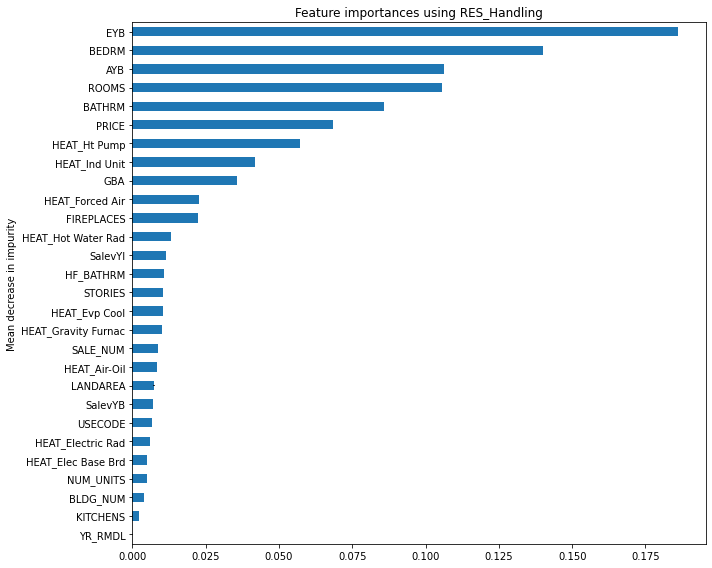

In [42]:
forest_importances = pd.Series(importances, index=df.columns[0:28])
sorted_idx = rf.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(10,8))
forest_importances.sort_values().plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using RES_Handling")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Adaptive Boosting Decision Tree

In [25]:
rng = np.random.RandomState(1)
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 400, num = 10)]}


ada = AdaBoostRegressor(DecisionTreeRegressor(random_state = rng), random_state = rng)
ada_cv = RandomizedSearchCV(ada, param_dist, scoring='neg_mean_absolute_error')
ada_cv.fit(X_train_ols, y_train)

evaluate(ada_cv.best_estimator_, X_test_ols, y_test)

Model Performance
R2: 0.732958005598612
Mean_Absolute_Error: 7.049672356918736
Mean_Squared_Error: 98.45715949831632
RMSE: 9.922558112619765


In [26]:
# Obtaining the best estimators from the model
print(ada_cv.best_estimator_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x1EB7AA2A840),
                  n_estimators=266,
                  random_state=RandomState(MT19937) at 0x1EB7AA2A940)


### XGBRegressor

In [51]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [53]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train_ols,y_train)
evaluate(xg_reg, X_test_ols, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model Performance
R2: 0.7405925558093822
Mean_Absolute_Error: 7.114448627768978
Mean_Squared_Error: 95.64233582429199
RMSE: 9.7796899656529


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


param_dist = {"n_neighbors": [3, 7],
              "weights": ["uniform", "distance"]}

KNR = KNeighborsRegressor()
KNR_cv = RandomizedSearchCV(KNR, param_dist, scoring='neg_mean_absolute_error')

KNR_cv.fit(X_train_ols, y_train)
#KNR.score(X_train, y_train)

evaluate(KNR_cv.best_estimator_, X_test_ols, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Performance
R2: 0.3946184394129292
Mean_Absolute_Error: 11.374063008403468
Mean_Squared_Error: 223.2014069609985
RMSE: 14.93992660494015


In [ ]:
print(KNR_cv.best_estimator_)

KNeighborsRegressor(n_neighbors=7, weights='distance')


### SVR

In [54]:
from sklearn.svm import SVR


svr = SVR()
svr.fit(X_train_ols, y_train)
evaluate(svr, X_test_ols, y_test)

Model Performance
R2: 0.2586294552374193
Mean_Absolute_Error: 13.258199439667239
Mean_Squared_Error: 273.3399221971347
RMSE: 16.532994955456033


### Ridge

In [21]:
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


param_grid = {'alpha': uniform()}
seed=6
model = Ridge()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed, scoring='neg_mean_absolute_error')
rsearch.fit(X_train_ols, y_train)
evaluate(rsearch, X_test_ols, y_test)

Model Performance
R2: 0.6833231738514682
Mean_Absolute_Error: 8.261211413104062
Mean_Squared_Error: 116.75729449002543
RMSE: 10.805428935957398


In [22]:
print(rsearch.best_estimator_)

Ridge(alpha=0.036608530436010756)


In [23]:
import random
from sklearn.linear_model import Lasso

param_grid = {'alpha': uniform()}
seed=6
model = Lasso()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed)
rsearch.fit(X_train_ols, y_train)
evaluate(rsearch, X_test_ols, y_test)

Model Performance
R2: 0.6824520183786058
Mean_Absolute_Error: 8.283858125130378
Mean_Squared_Error: 117.07848552041644
RMSE: 10.820281212631048


In [24]:
print(rsearch.best_estimator_)

Lasso(alpha=0.036608530436010756)


# Demo

In [144]:
import pickle
filename = 'model_randomForest_r_undrop.sav'
pickle.dump(RFR_cv, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

In [145]:
demo = X_train.head(5)
demo.to_csv('demo.csv')

In [146]:
demo = pd.read_csv('demo.csv')
demo.drop(['Unnamed: 0'], axis =1, inplace=True)
demo

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,INTWALL_Vinyl Comp,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,3,1,1.0,7,3,1900.0,2009.0,1986,3.0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,0,1.0,6,3,1923.0,2004.0,1964,2.0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,0,1.0,8,4,1920.0,2004.0,1964,2.0,1,...,0,0,0,0,0,1,0,0,0,0
3,2,1,2.0,7,4,1939.0,1950.0,1950,2.0,2,...,0,0,0,0,1,0,0,0,0,0
4,3,1,1.0,7,4,2010.0,2013.0,2013,3.0,1,...,0,0,0,0,0,0,0,0,0,1


In [147]:
predict= pd.DataFrame(loaded_model.predict(demo))
predict.columns = ['PREDICT_PRICE']
predict['PREDICT_PRICE'] = predict['PREDICT_PRICE']**3
predict

,PREDICT_PRICE
0,901592.724707
1,415670.028386
2,348661.844096
3,911570.310543
4,344606.466561


In [148]:
result = pd.concat([demo,predict], axis=1)
result

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,PREDICT_PRICE
0,3,1,1.0,7,3,1900.0,2009.0,1986,3.0,1,...,0,0,1,0,0,0,0,0,0,901592.724707
1,2,0,1.0,6,3,1923.0,2004.0,1964,2.0,1,...,0,0,0,0,1,0,0,0,0,415670.028386
2,3,0,1.0,8,4,1920.0,2004.0,1964,2.0,1,...,0,0,0,0,1,0,0,0,0,348661.844096
3,2,1,2.0,7,4,1939.0,1950.0,1950,2.0,2,...,0,0,0,1,0,0,0,0,0,911570.310543
4,3,1,1.0,7,4,2010.0,2013.0,2013,3.0,1,...,0,0,0,0,0,0,0,0,1,344606.466561
